# TASK - 2: Unemployment analysis with python
Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19.

**Objective: To analyise the unemployment rate.**



## Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

# Load the Data Set

In [ ]:
df=pd.read_csv('/content/Unemployment in India (1).csv')
df.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,30-11-2019,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,31-12-2019,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural


In [ ]:
 df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
# Display number of samples on each class
df['Area'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

In [ ]:
# To display the  concise summary of the data set.
print("display the information about the data set ")
df.info()

# To display the descriptive stats about data
print("display the statistics of the data set ")
df.describe()

display the information about the data set 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
display the statistics of the data set 


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
# To display the number of missing values in each column
print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [ ]:
# To display duplicated values
df.duplicated().sum()
df[df.duplicated()]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#To drop the duplicated values
df.drop_duplicates(inplace=True)

In [ ]:
# To display the missing values after handling
print("Number of missing values:")
print(df.isnull().sum())

Number of missing values:
Region                                      1
 Date                                       1
 Frequency                                  1
 Estimated Unemployment Rate (%)            1
 Estimated Employed                         1
 Estimated Labour Participation Rate (%)    1
Area                                        1
dtype: int64


# Data Visualisation

# Visualisation of Region

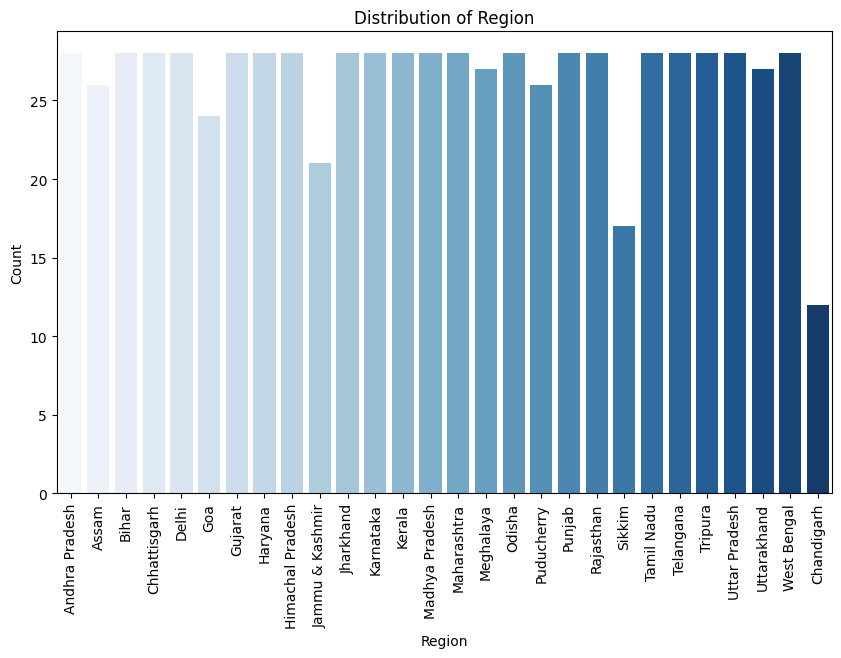

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=df, palette='Blues')
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Visualisation of Area

(-1.099999798585559, 1.0999999904088362, -1.0999996954229099, 1.0999999473927)

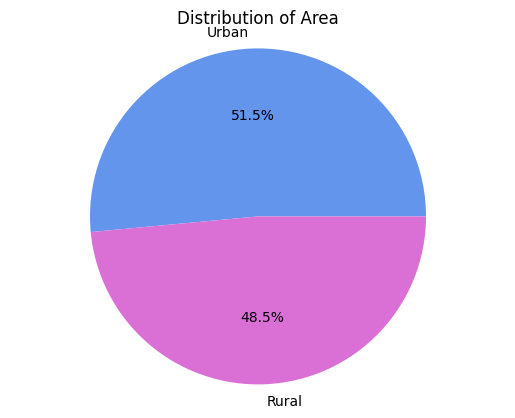

In [ ]:
area = df['Area'].value_counts()
plt.pie(area,labels=area.index,autopct='%1.1f%%',colors=['cornflowerblue', 'orchid'])
plt.title('Distribution of Area')
plt.axis('equal')

# Regional Estimated employment rate

In [ ]:
# Removing spaces from column names
df.columns = df.columns.str.strip()

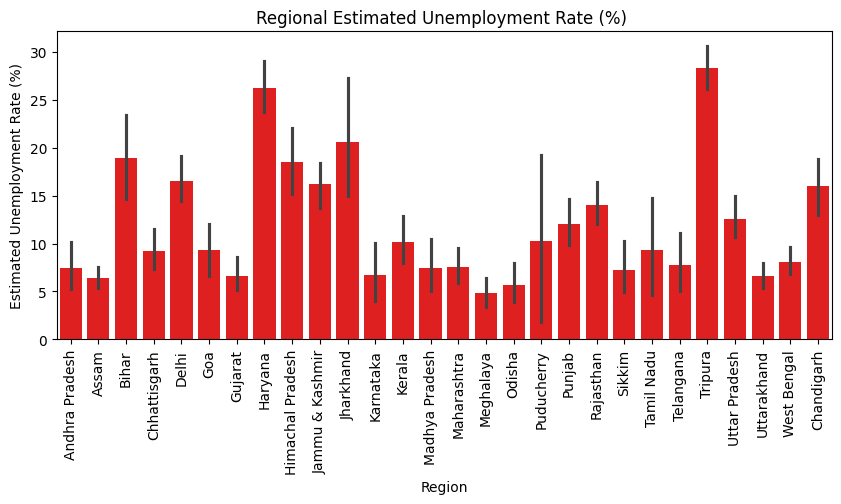

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=df,color='red')
plt.title('Regional Estimated Unemployment Rate (%) ')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()

# Visualisation of Frequency

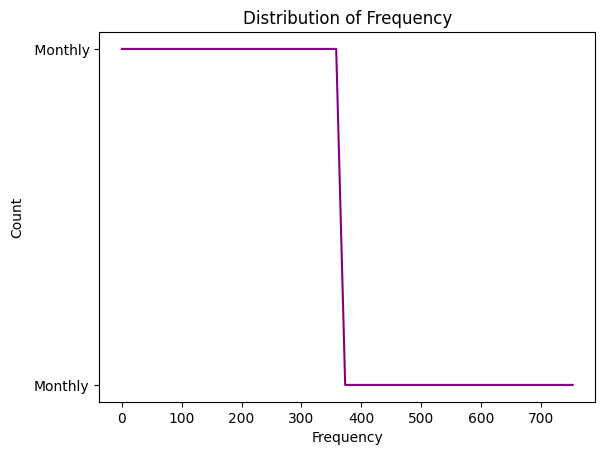

In [ ]:
sns.lineplot(df['Frequency'], color='purple',markers='*')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

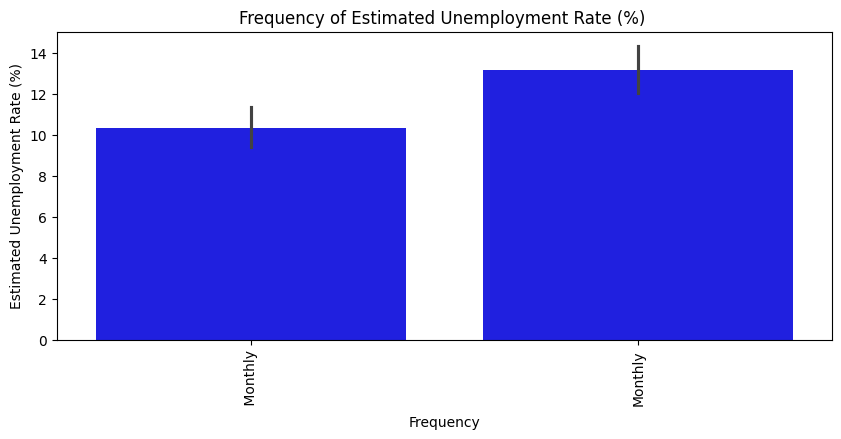

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x='Frequency', y='Estimated Unemployment Rate (%)', data=df,color='blue')
plt.title('Frequency of Estimated Unemployment Rate (%) ')
plt.xlabel('Frequency')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()

# Estimated Unemployment Rate between May 2019 to June 2020

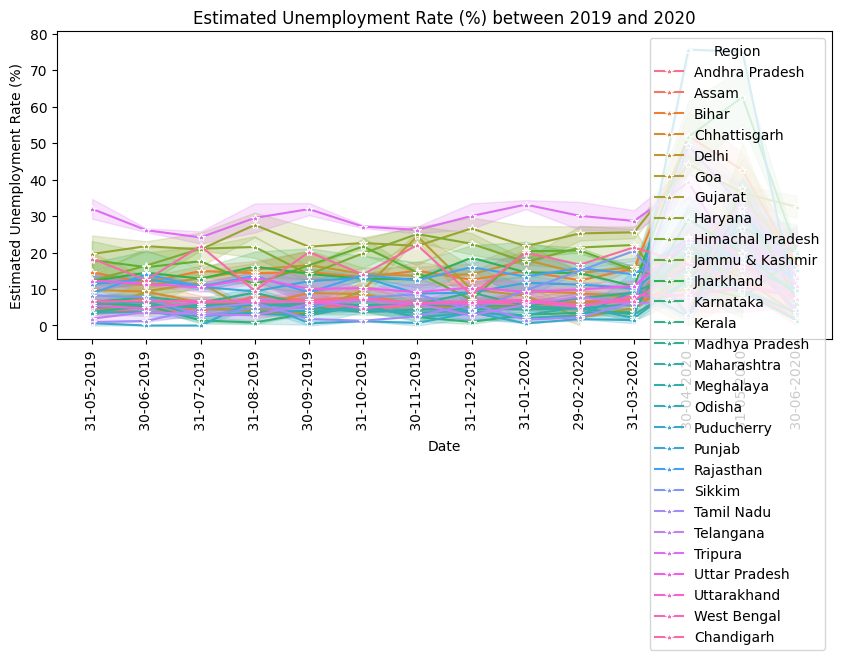

In [ ]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)',hue='Region' ,data=df, marker='*',color='purple')
plt.title('Estimated Unemployment Rate (%) between 2019 and 2020')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.show()

# Estimated Labour Participation Rate between May 2019 to June 2020

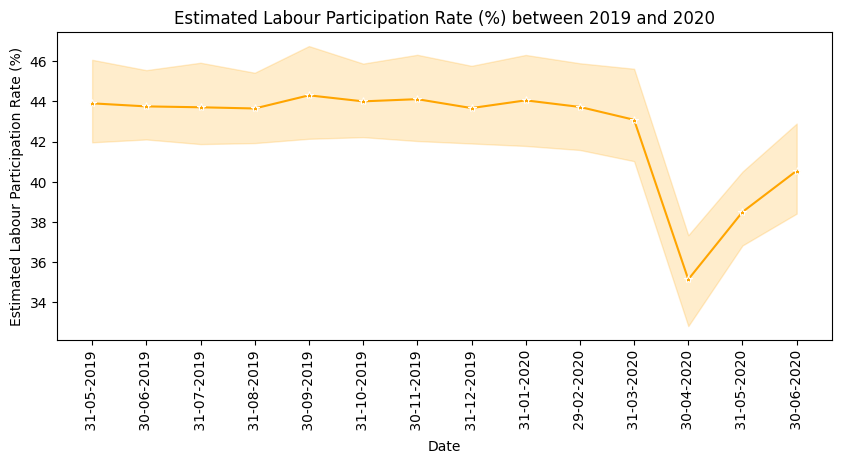

In [ ]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='Date', y='Estimated Labour Participation Rate (%)', data=df, marker='*',color='orange')
plt.title('Estimated Labour Participation Rate (%) between 2019 and 2020')
plt.xlabel('Date')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.xticks(rotation=90)
plt.show()

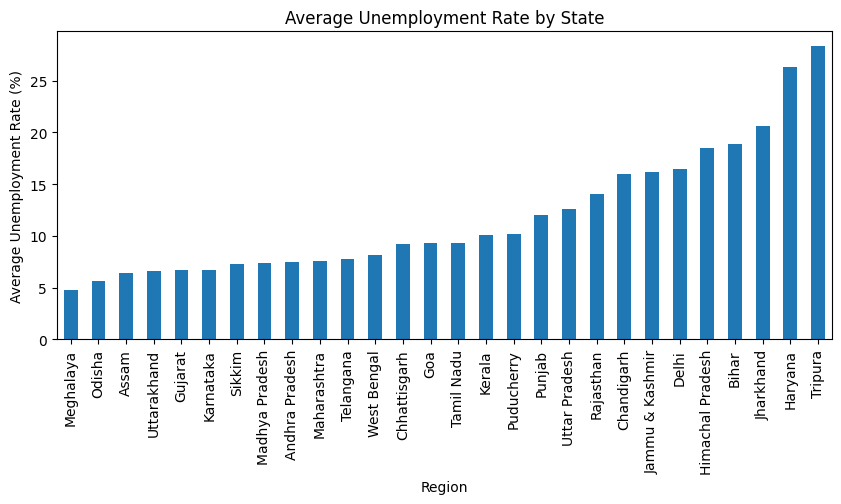

In [ ]:
average = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean()
plt.figure(figsize=(10, 4))
average.sort_values(ascending=True).plot(kind='bar')
plt.title("Average Unemployment Rate by State")
plt.xlabel("Region")
plt.ylabel("Average Unemployment Rate (%)")
plt.xticks(rotation=90)
plt.show()

# Regional Estimated Labour Participation Rate (%)

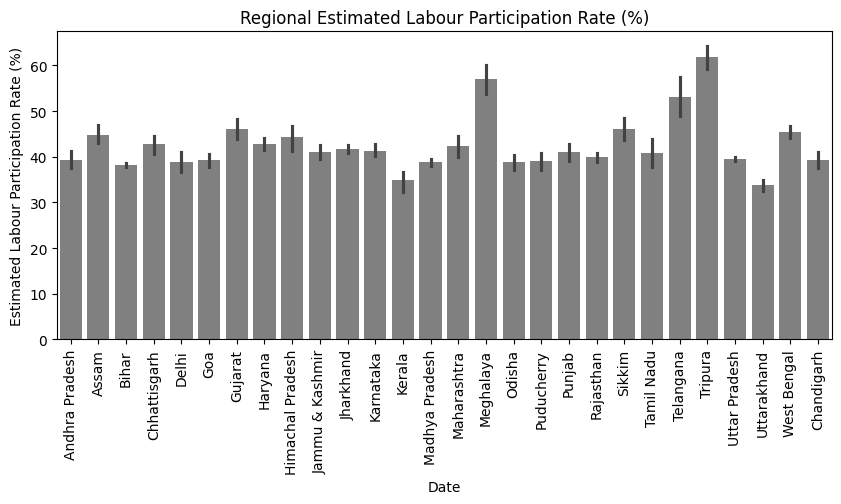

In [56]:
plt.figure(figsize=(10, 4))
sns.barplot(x='Region', y='Estimated Labour Participation Rate (%)', data=df,color='grey')
plt.title('Regional Estimated Labour Participation Rate (%)')
plt.xlabel('Date')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.xticks(rotation=90)
plt.show()

# Overall Representation of the data set

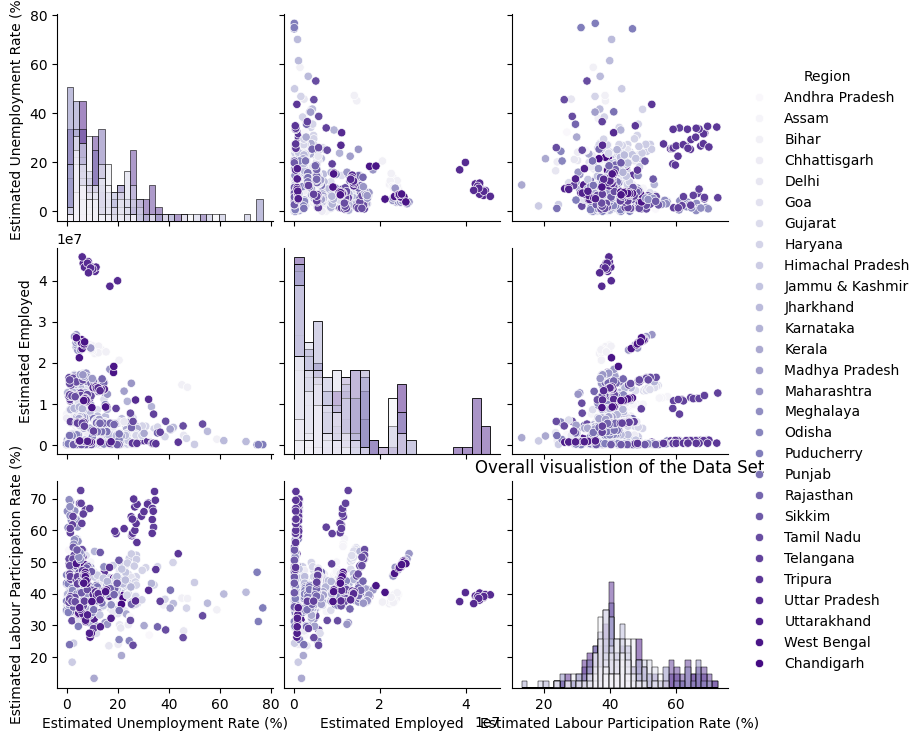

In [48]:
sns.pairplot(data = df, hue='Region', diag_kind="hist", palette="Purples")
plt.title('Overall visualistion of the Data Set')
plt.show()